# Problem Statement

To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

# Features

1. Loan_ID

2.  Gender

3.  Married

4.  Dependents

5.  Education

6.  Self_Employed

7.  ApplicantIncome

8.  CoapplicantIncome

9.  Loan_Amount

10. Loan_Amount_Term

11. Credit History

12. Property_Area

# Target Variable

Loan_Status

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Top 5 rows

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Last 5 Rows

In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Shape of Dataset

In [6]:
print("Number of Rows :    ",data.shape[0])
print("Number of Columns : ",data.shape[1])
pd.set_option('display.max_columns',None)


Number of Rows :     614
Number of Columns :  13


# Check for data types

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset contains variables of type 'object','integer' and 'float'.
We will separate the object type variables and convert them into numerical form.

# Let's check for Null values, whitespaces,'NA', '?', '-' 

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The null values are present in our dataset.
1. The feature 'Gender' contains 13 null values.
2. The feature 'Married' contains 3 null values.
1. The feature 'Dependents' contains 15 null values.
1. The feature 'Self_Employed' contains 32 null values.
1. The feature 'LoanAmount' contains 22 null values.
1. The feature 'Loan_Amount_Term' contains 14 null values.
1. The feature 'Credit_History' contains 13 null values.

We will fill this null values by using 'fillna' method

In [9]:
data.isin([' ','-','NA','?']).sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No whitespaces, '', 'NA' or '?' are present in our dataset.

# Let's check for descriptive statistics of Dataset

In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. By observing the mean and 50% values we can say that the features are not normally distributed.
2. Also there are outliers present in our dataset.
3. Applicants minimum income is 150 and maximum income is 81000.
4. Coapplicant's minimum income is 0 and maximum income is 41667.
5. Minimum loan amount is 9 and maximum is 700.
6. Minimum Tenure for loan is 12 months and maximum of this is 480 months.

# Seperate the Categorical and Numerical Variables

# Categorical Variables

In [11]:
cat_var =['Gender','Married','Dependents','Education','Self_Employed',
          'Property_Area','Credit_History','Loan_Status']


Since the variable 'Loan_ID' is a unique application ID provided to applicants which will not contribute in predicting Loan Status we will drop this variable

In [13]:
data.drop(columns = ['Loan_ID'],axis = 1,inplace = True)

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Visualization

# Categorical Variables

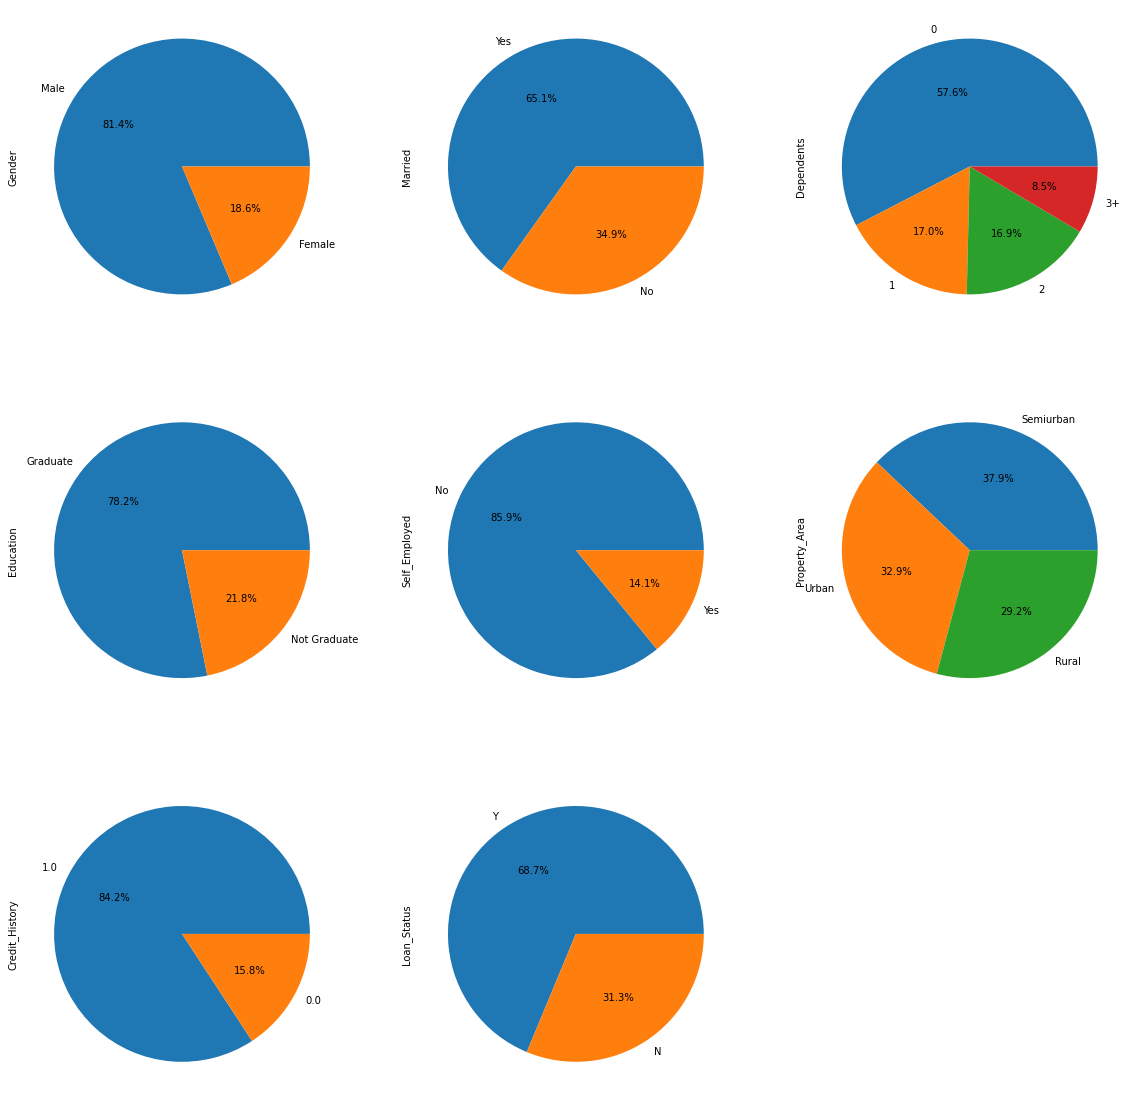

In [15]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in cat_var:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)

        data[i].value_counts().plot(kind="pie",autopct='%3.1f%%')
        data[i].value_counts()
    plotnumber+=1
    
plt.show()
   


# Observations:

1. More than 80% loan applications are coming from Males.
2. Out of all the applicants 65% are married.
3. 57.6% applicants have 0 dependents, 17% applicants have 1 dependents,17% applicants have 2 dependents and 8.5% applicants        have 3+ dependents.
4. 78.2% applicants are Graduates where remaining 21.8% are Non graduates.
5. Only 14.1% applicants are self-employed.
6. Majority, 37.9% applicants are from Semi-Urban area, 32.9% are from Urban area and 29.2% applicants are from Rural area.
7. 68.7% application are approved and 31.3% are rejected.
8. 84% applicants have credit history

# Numerical Variables

In [16]:
num_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

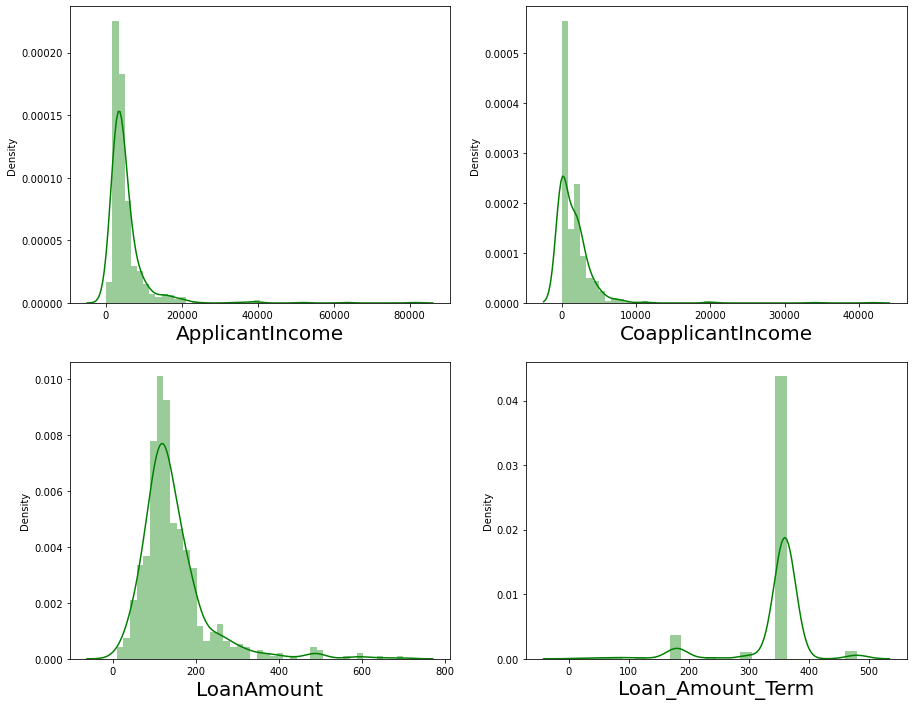

In [17]:
plt.figure(figsize=(15,12),facecolor='white')
plotnumber=1
for col in num_var:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.distplot(data[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

# Outliers Detection

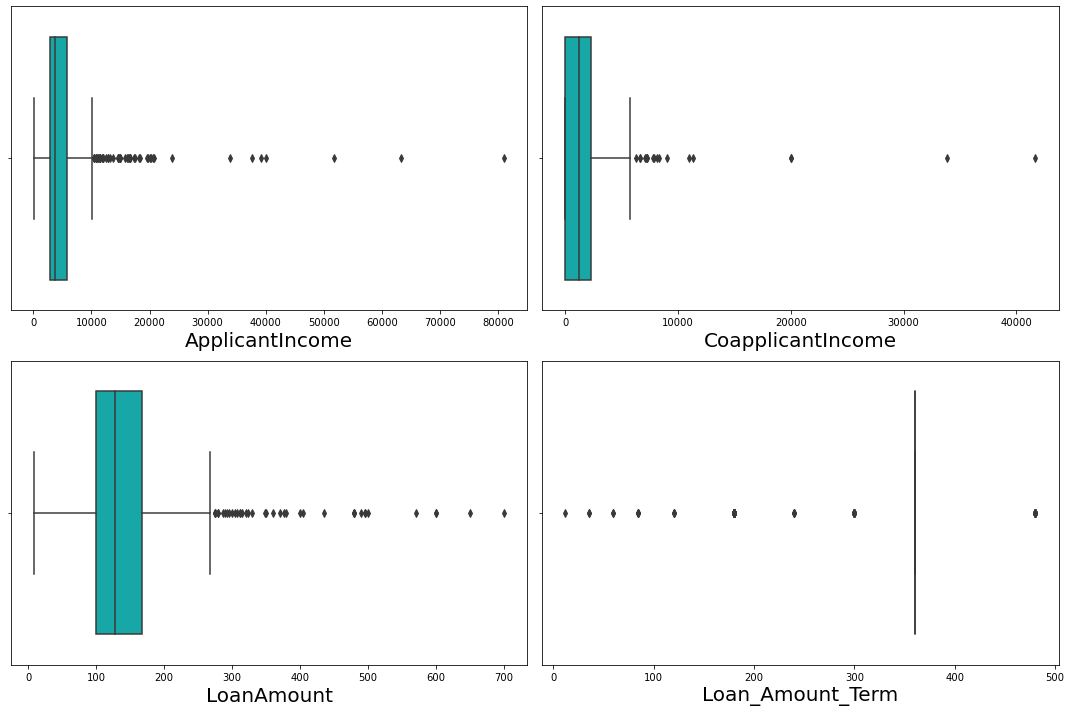

In [18]:
plt.figure(figsize=(15,10))
plotnumber=1

for i in num_var:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[i],color='c')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()



All the numerical variables have outliers.

# Filling Null Values

In [19]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])


# Checking for null value imputation

In [20]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the null values are filled up.

# Label Encoding


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_var:
    data[i] = le.fit_transform(data[i])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


# Outliers Removal

In [22]:
from scipy.stats import zscore

In [23]:
z = np.abs(zscore(data))


In [24]:
data_new= data[(z<3).all(axis = 1)]

# Percent data loss

In [25]:
data.shape,data_new.shape

((614, 12), (577, 12))

In [26]:
percent_loss = ((614-577)/614)*100
percent_loss

6.026058631921824

We lost 6% of data on outliers removal. It's not big so we can afford it.

# Skewness

In [27]:
data_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

skewness present in feature:
    1. Gender              
    2. Dependents                      
    3. Education            
    4. Self_Employed        
    5. ApplicantIncome      
    6. CoapplicantIncome    
    7. LoanAmount           
    8. Loan_Amount_Term    
    9. Credit_History      
    10.Loan_Status         

Out of the above features 'Gender','Education','Self_Employed','Credit_History','Dependents' are categorical features and 'Loan_Status' is target variable so we will not remove skewness from them.
We will consider only the features 'ApplicantIncome','CoapplicantIncome','LoanAmount' for removing skewness.

To remove skewness from the above mentioned variables we will use yeo-johnson transformation method.

In [28]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [29]:
data_new[skew] = scaler.fit_transform(data_new[skew].values)
data_new[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


# Let's check skewness once 

In [30]:
data_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Correlation

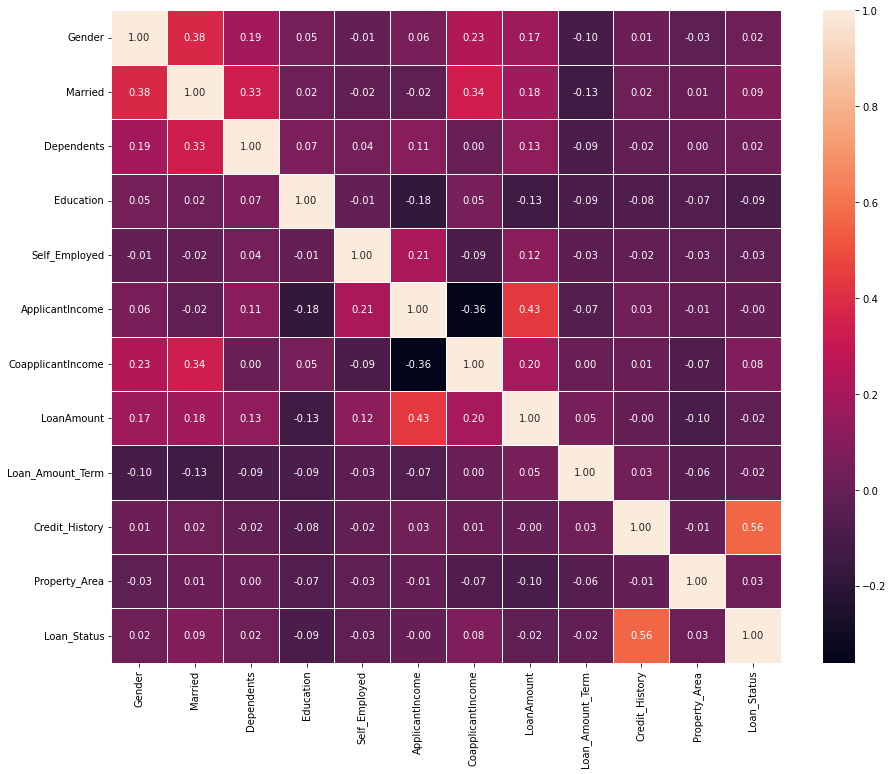

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(data_new.corr(),annot = True,linewidth=0.5,fmt = '0.2f')
plt.show()

In [32]:
data_new.corr()['Loan_Status'].sort_values()

Education           -0.092658
Self_Employed       -0.026525
LoanAmount          -0.023609
Loan_Amount_Term    -0.020291
ApplicantIncome     -0.002484
Gender               0.017408
Dependents           0.017872
Property_Area        0.026507
CoapplicantIncome    0.079344
Married              0.089026
Credit_History       0.560936
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

From the above correlationsummary we can see that
Credit_History has highest i.e. 56% correlation with target variable Loan_Status.


# Let's Seperate independent and dependent variable

In [72]:
y = data_new['Loan_Status']
X = data_new.drop(columns=['Loan_Status'],axis=1,inplace=True)

KeyError: 'Loan_Status'

In [73]:
X

# Check for multicollinearity

From the correlation heatmap we can observe that there is no considerable correlation between features.
Which means that no multicollinearity present.

# Balancing Target variable

In [33]:
data_new.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE

In [36]:
# Splitting data in target and dependent feature
X = data_new.drop(['Loan_Status'], axis =1)
y = data_new['Loan_Status']

In [37]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [38]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X= sc.fit_transform(X)

# Split data into training  and test data

In [40]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.3)

In [45]:
X_train.shape,y_train.shape

((557, 11), (557,))

# Let's check for best random state

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8368200836820083 on Random_state 96


# 1. Logistic Regression Model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=96, test_size=.3)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [49]:
accuracy_score_lr = accuracy_score(y_test,y_pred_lr)

In [50]:
print("accuracy_score_lr : ",accuracy_score(y_test,y_pred_lr))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_lr))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_lr))

accuracy_score_lr :  0.8368200836820083


confusion_matrix

 :  [[ 88  30]
 [  9 112]]


classification_report

 :                precision    recall  f1-score   support

           0       0.91      0.75      0.82       118
           1       0.79      0.93      0.85       121

    accuracy                           0.84       239
   macro avg       0.85      0.84      0.84       239
weighted avg       0.85      0.84      0.84       239



# RandomForestClassifier

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=96, test_size=.3)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred_rf = rf.predict(X_test)

In [53]:
accuracy_score_rf = accuracy_score(y_test,y_pred_rf)

In [54]:
print("accuracy_score_rf : ",accuracy_score(y_test,y_pred_rf))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_rf))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_rf))

accuracy_score_rf :  0.8577405857740585


confusion_matrix

 :  [[ 93  25]
 [  9 112]]


classification_report

 :                precision    recall  f1-score   support

           0       0.91      0.79      0.85       118
           1       0.82      0.93      0.87       121

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239



# Decision Tree Classifier

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=96, test_size=.3)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred_dt = dt.predict(X_test)

In [57]:
accuracy_score_dt = accuracy_score(y_test,y_pred_dt)

In [58]:
print("accuracy_score_dt : ",accuracy_score(y_test,y_pred_dt))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_dt))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_dt))

accuracy_score_dt :  0.7824267782426778


confusion_matrix

 :  [[96 22]
 [30 91]]


classification_report

 :                precision    recall  f1-score   support

           0       0.76      0.81      0.79       118
           1       0.81      0.75      0.78       121

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



# KNeighborsClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred_knn = knn.predict(X_test)

In [61]:
accuracy_score_knn = accuracy_score(y_test,y_pred_knn)

In [62]:
print("accuracy_score_knn : ",accuracy_score(y_test,y_pred_knn))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_knn))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_knn))

accuracy_score_knn :  0.7866108786610879


confusion_matrix

 :  [[ 87  31]
 [ 20 101]]


classification_report

 :                precision    recall  f1-score   support

           0       0.81      0.74      0.77       118
           1       0.77      0.83      0.80       121

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



# Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

# 1. Logistic Regression

In [73]:
cv_score_lr = cross_val_score(LogisticRegression(),X, y,cv=15).mean()
cv_score_lr

0.7852317726531564

# 2.RandomForestClassifier

In [72]:
cv_score_rf = cross_val_score(RandomForestClassifier(),X, y,cv=15).mean()
cv_score_rf

0.8292569298858606

# 3. DecisionTreeClassifier

In [71]:
cv_score_dt = cross_val_score(DecisionTreeClassifier(),X, y,cv=15).mean()
cv_score_dt

0.7362916375494992

# 4. KNeighborsClassifier

In [70]:
cv_score_knn = cross_val_score(KNeighborsClassifier(),X, y,cv=15).mean()
cv_score_knn

0.7739110179361752

# Result

In [74]:
result = pd.DataFrame({'Model Name':['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier'],
                       'Accuracy Score' : [accuracy_score_lr,accuracy_score_rf,accuracy_score_dt,accuracy_score_knn],
                       'Cross Validation SCore' : [cv_score_lr,cv_score_rf,cv_score_dt,cv_score_knn]})
result

,Model Name,Accuracy Score,Cross Validation SCore
0,LogisticRegression,0.836820,0.785232
1,RandomForestClassifier,0.857741,0.829257
2,DecisionTreeClassifier,0.782427,0.736292
3,KNeighborsClassifier,0.786611,0.773911


Since the model RandomForestClassifier gives us best accuracy score we will choose RandomForestClassifier as a final model.

# Let's apply Hyperparameter Tuning to this model

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
params = {'max_depth': (2,12,22,32,42),
         'criterion':('gini','entropy'),
         'max_features': ('auto','sqrt','log2'),
         'n_estimators': (5,10,20,25),
          'bootstrap':[True, False]
         }

In [78]:
clf = GridSearchCV(rf,param_grid = params,cv = 10,verbose = True,n_jobs = -1)

In [79]:
best_clf = clf.fit(X,y)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [80]:
best_clf.best_estimator_

RandomForestClassifier(max_depth=42, max_features='log2', n_estimators=25)

In [81]:
param_accuracy_dt = round(best_clf.score(X,y),3)
param_accuracy_dt

0.999

# Model Saving

In [82]:
import pickle

In [83]:
filename = "LoanStatusPrediction"
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [84]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

85.77405857740585


In [85]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],y_pred_rf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238
Predicted,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0,0,1,0
Original,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0,0,1,0
